In [1]:
 # PCA
# MNIST Data set
# Function to read and show image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0=pd.read_csv("train.csv",sep=",")

In [2]:
print(d0.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [3]:
#save the label into variable l
l=d0.label

In [4]:
d=d0.drop("label",axis=1)

# Display or plot the number 
plt.figure(figsize=(7,7))
idx=1
grid_data=d.iloc[idx].as_matrix().reshape(28,28) #reshape from 1d to 2d pixel array
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()
print(l[idx])

# 2-D Visualization using PCA

In [8]:
# Pick up first 15k data points to work on for time efficiency
labels=l.head(15000)
data=d.head(15000)

In [11]:
print("the shape of the data points: ", data.shape)

the shape of the data points:  (15000, 784)


In [12]:
# Firstly we are using manual method for using PCA
# Firstly Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [14]:
# First the covariance matrix which is: A^T*A
sample_data=standardized_data
# matrix multiplication using numpy
cov_matrix=np.matmul(sample_data.T,sample_data)
print("the shape of covariance matrix", cov_matrix.shape)

the shape of covariance matrix (784, 784)


In [15]:
# finding the top two eigen values corresponding the eigen vectors
# for projecting onto a 2 dimension
from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to high value)
# eigh function will return the eigen values in ascending order
# this code only generates the top 2 eigen value
values,vectors=eigh(cov_matrix,eigvals=(782,783))
print("shape of eigen vector ",vectors.shape)
# converting the eigen vector into 2-D shape for easyness for further computation
vector=vectors.T

shape of eigen vector  (784, 2)


In [16]:
vector.shape

(2, 784)

In [17]:
# Projecting the original data sample on the plane
# formed by the two principal eigen vector by vector-vector multiplication
import matplotlib.pyplot as plt
new_coordinate=np.matmul(vector,sample_data.T)
print(" the new coordinate = ",vector.shape," X ",sample_data.T.shape," = ",new_coordinate.shape)

 the new coordinate =  (2, 784)  X  (784, 15000)  =  (2, 15000)


In [18]:
import pandas as pd
# appending the label to the 2d projected data
new_coordinates=np.vstack((new_coordinate,labels)).T
# creating the new data frame for plotting the labelled points
dataframe=pd.DataFrame(data=new_coordinates,columns=("1st pc","2nd pc","label"))
print(dataframe.head())

     1st pc     2nd pc  label
0 -5.558661  -5.043558    1.0
1  6.193635  19.305278    0.0
2 -1.909878  -7.678775    1.0
3  5.525748  -0.464845    4.0
4  6.366527  26.644289    0.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


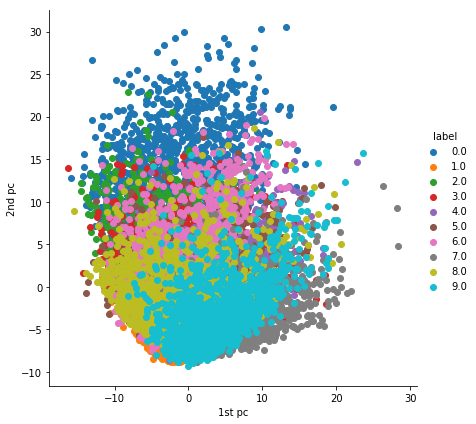

In [20]:
# plotting the 2d  data points with seaborn
import seaborn as sns 
sns.FacetGrid(dataframe,hue='label',size=6).map(plt.scatter,'1st pc','2nd pc').add_legend()
plt.show()

In [21]:
# without using manual method

In [37]:
# PCA using the scikit learn
from sklearn import decomposition
pca=decomposition.PCA()

In [38]:
# configuring the parameters 
# the number of componenets =2
pca.n_components=2
pca_data=pca.fit_transform(sample_data)
print("the shape of pca data :",pca_data.shape)

the shape of pca data : (15000, 2)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


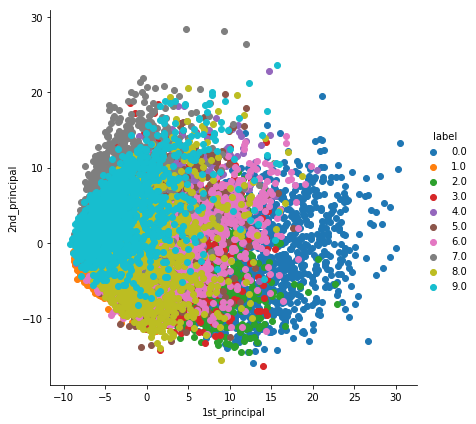

In [41]:
# attaching the label for each 2-d data point 
pca_data1 = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data1, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

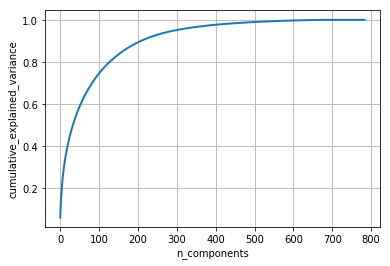

In [42]:
# PCA for dimensionality reduction
pca.n_components=784
pca_data=pca.fit_transform(sample_data)
percentage_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained=np.cumsum(percentage_var_explained)

# plot the PCA Spectrum
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cumulative_explained_variance')
plt.show()